# Рекомендация тарифов

## Открытие и изучение файла

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Чтобы игнорировать предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
print(df['calls'].corr(df['minutes']))

0.9820832355742293


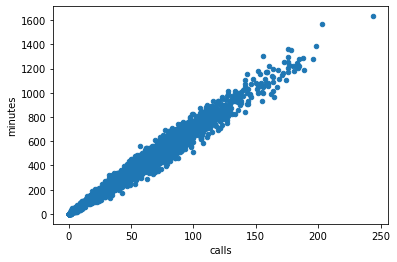

In [4]:
df.plot(x='calls', y='minutes', kind='scatter')

Тут есть мультиколлинеаорность факторов, тогда сразу можно один из факторов можно смело исключить.<br>


In [5]:
df = df.drop('calls', 1)

In [6]:
df

,minutes,messages,mb_used,is_ultra
0,311.90,83.0,19915.42,0
1,516.75,56.0,22696.96,0
2,467.66,86.0,21060.45,0
3,745.53,81.0,8437.39,1
4,418.74,1.0,14502.75,0
...,...,...,...,...
3209,910.98,20.0,35124.90,1
3210,190.36,0.0,3275.61,0
3211,634.44,70.0,13974.06,0
3212,462.32,90.0,31239.78,0


## Разбейте данные на выборки

In [7]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

In [8]:
print(features_train.shape)
print(target_train.shape)

print(features_valid.shape)
print(target_valid.shape)

print(features_test.shape)
print(target_test.shape)

(1928, 3)
(1928,)
(643, 3)
(643,)
(643, 3)
(643,)


Разбил данные на признаки и целевой признак. Затем разбили еще на 6 выборок: 2 обучающие, 2 валидационные и 2 тестовые

## Исследуйте модели

**Дерево решений - Decision Tree**

In [9]:
best_model_dt = None
best_result_dt = 0
best_depth = 0
for depth in range(1, 101):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(predictions_valid, target_valid)
    if result > best_result_dt:
        best_result_dt = result
        best_model_dt = model
        best_depth = depth
        
print(f'Лучшая accuracy у модели решающего дерева равна {round(best_result_dt, 4)}, глубина деревьев: {best_depth}')

Лучшая accuracy у модели решающего дерева равна 0.7885, глубина деревьев: 4


**Случайный лес - Random Forest**

In [10]:
best_model_rt = None
best_result_rt = 0
best_est = 0
for est in range(10, 101, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(predictions_valid, target_valid)
    if result > best_result_rt:
        best_result_rt = result
        best_model_rt = model
        best_est = est
        
print(f'Лучшая accuracy у модели случайного дерева равна {round(best_result_rt, 4)}, Колличество деревьев: {best_est}')

Лучшая accuracy у модели случайного дерева равна 0.7823, Колличество деревьев: 20


**Логическая регрессия**

In [11]:
model_lr = LogisticRegression(random_state=12345)
model_lr.fit(features_train, target_train)
predictions = model_lr.predict(features_valid)
result = accuracy_score(target_valid, predictions)
print(round(result, 4))

0.7076


Я сделал несколько моделей и сравнил между собой. Самая лучшая точность у модели **Decision Tree**

## Проверьте модель на тестовой выборке

Возьмём лучшую модель (в нашем случае Decision Tree) и сделаем предсказание

In [12]:
predictions = best_model_dt.predict(features_test)
result = accuracy_score(target_test, predictions)
print('accuracy_score равняется', round(result, 4))

accuracy_score равняется 0.7807


## (бонус) Проверка модели на адекватность

Проверка Decision Tree

In [13]:
predictions_valid = best_model_dt.predict(features_valid)
result = mean_squared_error(target_valid, predictions_valid)**0.5
print('mse -', result)

mse - 0.45990059105717984


Проверка Random Forest

In [14]:
predictions_valid = best_model_rt.predict(features_valid)
result = mean_squared_error(target_valid, predictions_valid)**0.5
print('mse -', result)

mse - 0.46661482345519006
